## EDA pdf-uri


In [9]:
import pandas as pd
from collections import Counter
import re
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer


In [12]:
df = pd.read_csv("texte_dataframe.csv")
print(df.shape)
df.head()


(3992, 4)


,pdf_name,txt_name,text_raw,text_clean
0,1_1_2001-06-20.pdf,1_1_2001-06-20.txt,DISPOZITIE LEGEA 10 1 din 20/06/2001 SE RESTIT...,DISPOZITIE LEGEA 10 1 din 20/06/2001 SE RESTIT...
1,2_2987_2004-05-24.pdf,2_2987_2004-05-24.txt,DISPOZITIE LEGEA 10 2987 din 24/05/2004 RESPIN...,DISPOZITIE LEGEA 10 2987 din 24/05/2004 RESPIN...
2,7_2913_2004-05-13.pdf,7_2913_2004-05-13.txt,DISPOZITIE LEGEA 10 2913 din 13/05/2004 RESPIN...,DISPOZITIE LEGEA 10 2913 din 13/05/2004 RESPIN...
3,9_23_2001-07-10.pdf,9_23_2001-07-10.txt,DISPOZITIE LEGEA 10 23 din 10/07/2001\nSE REST...,DISPOZITIE LEGEA 10 23 din 10/07/2001\nSE REST...
4,10_22_2001-07-10.pdf,10_22_2001-07-10.txt,DISPOZITIE LEGEA 10 22 din 10/07/2001\nSE REST...,DISPOZITIE LEGEA 10 22 din 10/07/2001\nSE REST...


In [14]:
df.isna().sum()

pdf_name          0
txt_name          0
text_raw          0
text_length       0
num_paragraphs    0
dtype: int64

In [9]:
df = df[~df["text_raw"].isna()]    

72 18459
1 48


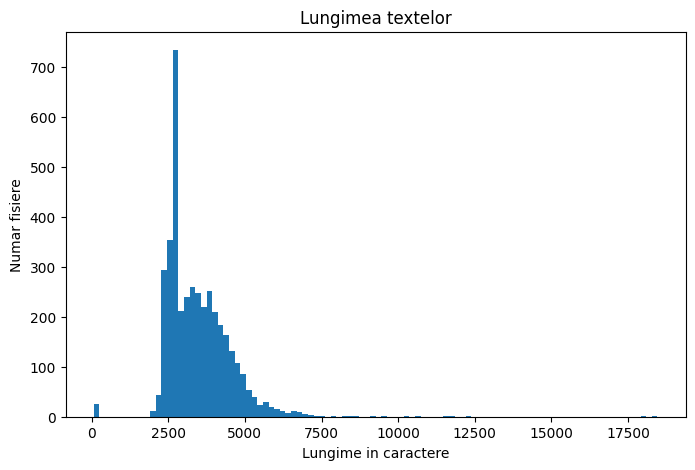

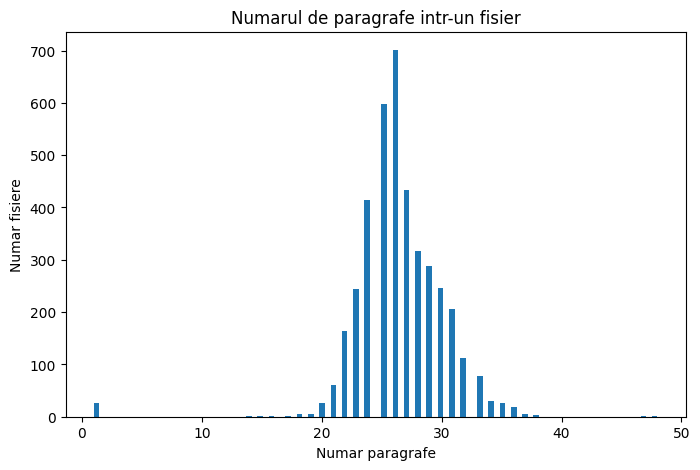

In [21]:
df["text_length"] = df["text_raw"].apply(len)
df["num_paragraphs"] = df["text_raw"].apply(lambda t: len([p for p in str(t).split("\n") if p.strip()]))

print(df["text_length"].min(), df["text_length"].max())
print(df["num_paragraphs"].min(), df["num_paragraphs"].max())

plt.figure(figsize=(8,5))
plt.hist(df["text_length"], bins=100)
plt.title("Lungimea textelor")
plt.xlabel("Lungime in caractere")
plt.ylabel("Numar fisiere")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df["num_paragraphs"], bins=100)
plt.title("Numarul de paragrafe intr-un fisier")
plt.xlabel("Numar paragrafe")
plt.ylabel("Numar fisiere")
plt.show()


In [25]:
min_paragraphs = df["num_paragraphs"].min()
df_min_paragraphs = df[df["num_paragraphs"] == min_paragraphs]

min_length = df["text_length"].min()
df_min_length = df[df["text_length"] == min_length]

print("\nTexte cu cel mai mic numar de paragrafe")
print(df_min_paragraphs[["pdf_name", "txt_name", "num_paragraphs", "text_length"]])

print("\nTExte cu cel mai scurt continut")
print(df_min_length[["pdf_name", "txt_name", "num_paragraphs", "text_length"]])




Texte cu cel mai mic numar de paragrafe
                       pdf_name                   txt_name  num_paragraphs  \
259     539_5216_2006-01-24.pdf    539_5216_2006-01-24.txt               1   
699    1714_5299_2006-01-27.pdf   1714_5299_2006-01-27.txt               1   
827    2030_5449_2006-03-06.pdf   2030_5449_2006-03-06.txt               1   
1123   2916_5416_2006-03-01.pdf   2916_5416_2006-03-01.txt               1   
1124   2920_5447_2006-03-06.pdf   2920_5447_2006-03-06.txt               1   
1178   3073_5426_2006-03-01.pdf   3073_5426_2006-03-01.txt               1   
1240   3228_5974_2006-06-19.pdf   3228_5974_2006-06-19.txt               1   
1546   4401_5976_2006-06-19.pdf   4401_5976_2006-06-19.txt               1   
1751   5306_6089_2006-06-19.pdf   5306_6089_2006-06-19.txt               1   
1766   5382_4438_2005-07-18.pdf   5382_4438_2005-07-18.txt               1   
1810   5606_5629_2006-03-20.pdf   5606_5629_2006-03-20.txt               1   
2040   6593_3181_2004-0

In [26]:
df = df[df["num_paragraphs"] > 1]
print("Texte ramase dupa stergere:", len(df))
df.to_csv("texte_dataframe.csv", index=False)

Texte ramase dupa stergere: 3992


1937 18459
14 48


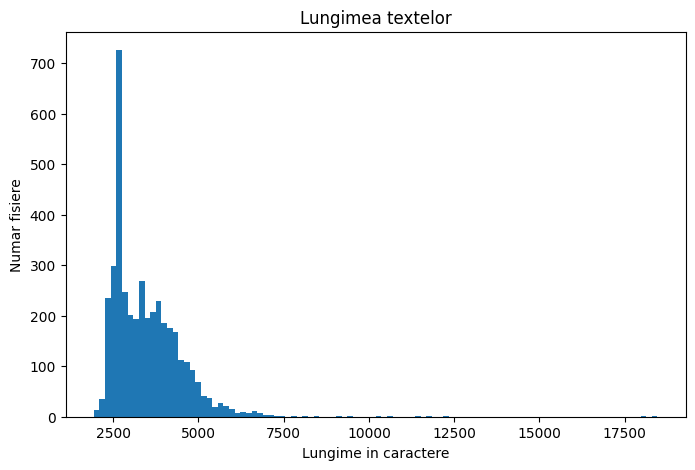

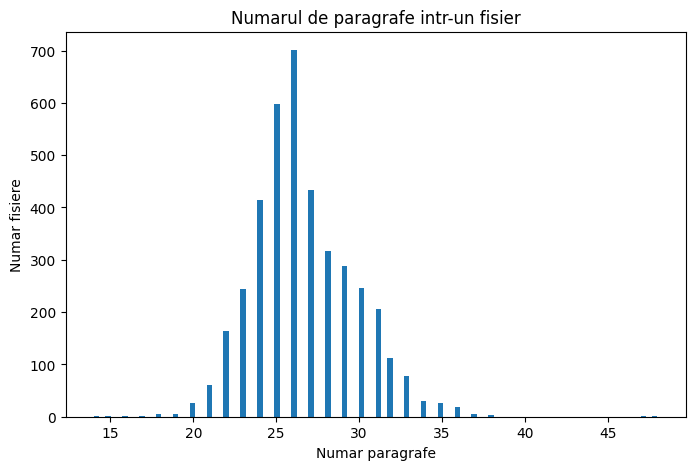

In [27]:
df["text_length"] = df["text_raw"].apply(len)
df["num_paragraphs"] = df["text_raw"].apply(lambda t: len([p for p in str(t).split("\n") if p.strip()]))

print(df["text_length"].min(), df["text_length"].max())
print(df["num_paragraphs"].min(), df["num_paragraphs"].max())

plt.figure(figsize=(8,5))
plt.hist(df["text_length"], bins=100)
plt.title("Lungimea textelor")
plt.xlabel("Lungime in caractere")
plt.ylabel("Numar fisiere")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df["num_paragraphs"], bins=100)
plt.title("Numarul de paragrafe intr-un fisier")
plt.xlabel("Numar paragrafe")
plt.ylabel("Numar fisiere")
plt.show()

In [32]:
max_paragraphs = df["num_paragraphs"].max()
df_max_paragraphs = df[df["num_paragraphs"] == max_paragraphs]

max_length = df["text_length"].max()
df_max_length = df[df["text_length"] == max_length]

print("\nTexte cu cel mai mare numar de paragrafe")
print(df_max_paragraphs[["pdf_name", "txt_name", "num_paragraphs", "text_length"]])

print("\nTexte cu cel mai lung continut")
print(df_max_length[["pdf_name", "txt_name", "num_paragraphs", "text_length"]])



Texte cu cel mai mare numar de paragrafe
                     pdf_name                  txt_name  num_paragraphs  \
975  2447_4813_2005-11-21.pdf  2447_4813_2005-11-21.txt              48   

     text_length  
975         5658  

Texte cu cel mai lung continut
                      pdf_name                  txt_name  num_paragraphs  \
2018  6556_6947_2006-11-20.pdf  6556_6947_2006-11-20.txt              34   

      text_length  
2018        18459  


In [7]:
def get_tokens(text):
    text = re.sub(r"[^a-zA-ZăîâșțĂÎÂȘȚ\s]", " ", text)
    tokens = [w.lower() for w in text.split() if len(w) > 2]
    return tokens

all_words = []
df["text_raw"].apply(lambda t: all_words.extend(get_tokens(t)))

cnt = Counter(all_words)
print(cnt.most_common(30))


[('bucuresti', 44084), ('art', 30731), ('din', 28758), ('general', 22431), ('legea', 21337), ('municipiului', 17063), ('directiei', 15971), ('sector', 15404), ('prin', 14545), ('privind', 13611), ('str', 13345), ('baza', 12798), ('pentru', 12568), ('situat', 11751), ('domiciliul', 11334), ('dispozitie', 11107), ('juridic', 11069), ('legii', 10701), ('cetatean', 10227), ('publice', 9721), ('roman', 9522), ('natura', 9427), ('care', 9371), ('directia', 8940), ('imobilul', 8432), ('legislatie', 8016), ('primar', 7980), ('administratiei', 7942), ('evidenta', 7935), ('seria', 7915)]


In [8]:
def vocab_size(text):
    tokens = get_tokens(text)
    return len(set(tokens))

df["vocab_size"] = df["text_raw"].apply(vocab_size)
df["vocab_ratio"] = df["vocab_size"] / df["text_length"]
df[["vocab_size", "vocab_ratio"]].describe()


,vocab_size,vocab_ratio
count,3992.000000,3992.000000
mean,178.516784,0.052586
std,36.227409,0.006750
min,116.000000,0.014139
25%,151.000000,0.049080
50%,168.000000,0.054297
75%,206.000000,0.056701
max,332.000000,0.067323


In [14]:
import re
def has_diacritics(text):
    return bool(re.search(r"[ăâîșțĂÂÎȘȚ]", str(text)))
texts_with_diacritics = []
texts_without_diacritics = []

for i, row in df.iterrows():
    if has_diacritics(row["text_raw"]):
        texts_with_diacritics.append((row["pdf_name"], row["text_raw"]))
    else:
        texts_without_diacritics.append((row["pdf_name"], row["text_raw"]))


print(f"Texte cu diacritice: {len(texts_with_diacritics)}")
print(f"Texte fara diacritice: {len(texts_without_diacritics)}")

print("\nExemple cu diacritice")
for name, text in texts_with_diacritics[:5]:
    print(f"\n{name}")
    print("-" * 60)
    print(text) 
    print("-" * 60)




Texte cu diacritice: 3
Texte fara diacritice: 3989

Exemple cu diacritice

1729_11821_2009-06-16.pdf
------------------------------------------------------------
PRIMAR GENERAL Etaj: 1, cam. 101 tel .: 305 55 89; 305 55 90 305 55 00 int. 1101 fax: 312 00 30 e-mail: primar@bucuresti-primaria.ro
ALITY
R ISO9001
R . ISO 14001
UKAS QQUIALITY MANAGEMENT
001
UKAS ENVIRONMENTAL MANAGEMENT 001
1 K
SMC certificat ISO 9001 : 2000 ) $MM certificat ISO14001 : 2004 Către caso de dele,
Nr. 850
1x 30
HCGMB
Primăria Municipiului Bucureștivi :::
4
PSi ÎNCETEAZA APLICABILITATEA APG 1418/2008
Nr.
850
DISPOZIȚIE
din
23.06.2009
Având în vedere referatul Direcției Managementul Resurselor Umane nr. 3925/1/17.06.2009; În temeiul art. 68 (1) din Legea nr. 215/2001 republicată, a administrației publice locale, cu modificările și completările ulterioare:
PRIMARUL GENERAL DISPUNE:
Art. 1. Începând cu data prezentei comisia pentru negocierea acordului și contractului colectiv de muncă la nivelul aparatului de spec

In [25]:
df["text_clean"] = df["text_raw"]
cols = ["pdf_name", "txt_name", "text_raw", "text_clean"]
df[cols].to_csv("texte_dataframe.csv", index=False)

In [16]:
import unidecode
mask = df["text_clean"].apply(has_diacritics)

print(f"Texte cu diacritice gasite: {mask.sum()}")

df.loc[mask, "text_clean"] = df.loc[mask, "text_clean"].apply(unidecode.unidecode)
cols = ["pdf_name", "txt_name", "text_raw", "text_clean"]
df[cols].to_csv("texte_dataframe.csv", index=False)


Texte cu diacritice gasite: 0


In [34]:
df = pd.read_csv("texte_dataframe.csv")

In [62]:
def find_primar_general_paragraphs(text):
    paragraphs = [p.strip() for p in str(text).split("\n") if p.strip()]
    indices = []
    for i, p in enumerate(paragraphs):
        if p == "PRIMAR GENERAL" or p == "PRIMAR GENERAL," or p == "p. PRIMAR GENERAL," or p == "p. PRIMAR GENERAL" or p == "PRIMAR GENERAL, TRAIAN BASESCU" or p == "PRIMAR GENERAL, ADRIEAN VIDEANU" or p == "PRIMAR GENERAL TRAIAN BASESCU" or p == "PRIMAR GENERAL ADRIEAN VIDEANU" or p == "p.PRIMAR GENERAL," or p == "p.PRIMAR GENERAL":
            indices.append(i)
    return indices if indices else None

df["primar_general_paragraphs"] = df["text_clean"].apply(find_primar_general_paragraphs)

num_texts = df["primar_general_paragraphs"].notnull().sum()
print(f"Texte cu paragraf 'PRIMAR GENERAL' sau 'PRIMAR GENERAL,': {num_texts} din {len(df)}")

examples = df[df["primar_general_paragraphs"].isnull()][["pdf_name", "text_clean"]].head(10)
print(f"\nTexte fara': {len(df[df['primar_general_paragraphs'].isnull()])} din {len(df)}")
print(examples[["pdf_name"]].to_string(index=False))



Texte cu paragraf 'PRIMAR GENERAL' sau 'PRIMAR GENERAL,': 3976 din 3992

Texte fara': 16 din 3992
                 pdf_name
    303_82_2001-08-28.pdf
   481_152_2001-11-09.pdf
   948_247_2002-03-13.pdf
   1322_83_2001-08-31.pdf
  1531_111_2001-09-25.pdf
1729_11821_2009-06-16.pdf
 3159_5796_2006-05-02.pdf
 3565_3117_2004-07-09.pdf
  3805_203_2001-12-13.pdf
3834_11820_2009-06-16.pdf


In [63]:
no_pg = df[df["primar_general_paragraphs"].isnull()][["pdf_name", "text_clean"]]

print(f"Texte fara: {len(no_pg)} din {len(df)}\n")

for i, row in no_pg.iterrows():
    paragraphs = [p.strip() for p in str(row["text_clean"]).split("\n") if p.strip()]
    last_paragraphs = paragraphs[-12:] if len(paragraphs) >= 5 else paragraphs
    print(f"--- {row['pdf_name']} ---")
    for p in last_paragraphs:
        print(p)
    print("\n" + "-"*70 + "\n")


Texte fara: 16 din 3992

--- 303_82_2001-08-28.pdf ---
Art.3. Contractele de inchiriere dintre chiriasi si AFI inceteaza de drept pe data punerii in posesie a proprietarului.
Art.4. Dispozitia se comunica proprietarilor, Primarului sectorului 1, Directiei generale de investitii si achizitii publice, Directiei patrimoniu, evidenta proprietatii, cadastru si Administratiei Fondului Imobiliar, prin grija Directiei generale juridic- contencios, legislatie.
Copia dispozitiei se va comunica si Directiei Generale a Finantelor Publice si Controlului Financiar de Stat a Municipiului Bucuresti. PRIMAR GENERAL, TRAIAN BASESCU
Avizeaza pentru legalitate, Secretarul General al Municipiului Bucuresti Drd. ANTON PETRISOR PARLAGI
Legea nr. 10/2001 Bucuresti, Nr. 82/ 28.08.2001
AVIZ FAVORABIL,
DIRECTIA GENERALA JURIDIC- CONTENCIOS SI LEGISLATIE
DIRECTOR GENERAL,
RADU DINULESCU
DIRECTIA PATRIMONIU, EVIDENTA PROPRIETATI, CADASTRU
DIRECTOR,
CRISTINA SETRAN

-------------------------------------------------

In [48]:

def contains_primar_general_anywhere(text):
    return bool(re.search(r"\bPRIMAR\s+GENERAL\b", str(text)))

no_pg_at_all = df[
    df["primar_general_paragraphs"].isnull() & 
    ~df["text_clean"].apply(contains_primar_general_anywhere)
]

print(f"Texte fără niciun fel de 'PRIMAR GENERAL': {len(no_pg_at_all)} din {len(df)}\n")

print("Exemple de fișiere fără nicio apariție 'PRIMAR GENERAL':")
print(no_pg_at_all[["pdf_name"]].to_string(index=False))

print("\n--- Ultimele paragrafe pentru aceste fișiere ---\n")

for i, row in no_pg_at_all.iterrows():
    paragraphs = [p.strip() for p in str(row["text_clean"]).split("\n") if p.strip()]
    last_paragraphs = paragraphs[-5:] if len(paragraphs) >= 5 else paragraphs
    print(f"--- {row['pdf_name']} ---")
    for p in last_paragraphs:
        print(p)
    print()


Texte fără niciun fel de 'PRIMAR GENERAL': 2 din 3992

Exemple de fișiere fără nicio apariție 'PRIMAR GENERAL':
                 pdf_name
1729_11821_2009-06-16.pdf
3834_11820_2009-06-16.pdf

--- Ultimele paragrafe pentru aceste fișiere ---

--- 1729_11821_2009-06-16.pdf ---
Art. 2. Anexa face parte integranta din prezenta dispozitie.
Art. 3. Membrii comisiei astfel infiintate vor negocia cu reprezentantii organizatiilor sindicale reprezentative, din cadrul primariei Municipiului Bucuresti, termenii acordului colectiv si contractului colectiv de munca la nivelul aparatului de specialitate al Primarului General.
Art. 4. Responsabil cu relatia dintre sindicatele reprezentative pearticipante la negocieri si membrii comisiei de negociere va fi d-na Geta Dragoi.
Art. 5. La data intrarii in vigoare a prezentei dispozitii, Dispozitia Primarului General nr.1418/2008 isi inceteaza aplicabilitatea.
Art. 6. Membrii comisiei, Directia Managementul Resurselor Umane, si Directia Administratie Publica

In [64]:
def get_context_paragraphs(text, window=3):
    paragraphs = [p.strip() for p in str(text).split("\n") if p.strip()]
    contexts = []
    for i, p in enumerate(paragraphs):
        if re.search(r"\bPRIMAR\s+GENERAL\b", p):
            start = max(0, i - window)
            end = min(len(paragraphs), i + window + 1)
            context = paragraphs[start:end]
            contexts.append(context)
    return contexts if contexts else None

df["primar_general_contexts"] = df["text_clean"].apply(get_context_paragraphs)

count_with_pg = df["primar_general_contexts"].notnull().sum()
print(f"Texte care contin 'PRIMAR GENERAL': {count_with_pg} din {len(df)}\n")

for i, row in df[df["primar_general_contexts"].notnull()].head(5).iterrows():
    print(f"--- {row['pdf_name']} ---")
    for context in row["primar_general_contexts"]:
        print("\n".join(context))
        print("-" * 60)
    print()


Texte care contin 'PRIMAR GENERAL': 3990 din 3992

--- 1_1_2001-06-20.pdf ---
Art.4. Contractele de inchiriere dintre chiriasi si D.G.A.F.I. inceteaza de drept pe data punerii in posesie a proprietarului.
Art.5. Dispozitia se comunica proprietarului, Primarului sectorului 1, Directiei Generale de investitii si achizitii publice, Directiei Generale de Administrare a Fondului Imobiliar, prin grija Directiei generale juridic- contencios, legislatie.
Copia dispozitiei se va comunica si Directiei Generale a Finantelor Publice si Controlului Financiar de Stat a Municipiului Bucuresti.
PRIMAR GENERAL, TRAIAN BASESCU
Bucuresti,
nr. 1/20.06.2001
Avizeaza pentru legalitate, Secretarul General al Municipiului Bucuresti
------------------------------------------------------------

--- 2_2987_2004-05-24.pdf ---
Art. 2. Prezenta dispozitie poate fi atacata in termen de 30 de zile de la comunicare la Sectia Civila a Tribunalului Bucuresti.
Art. 3. Dispozitia se comunica notificatoarei, Primarului Sec

In [71]:
def remove_primar_general_footer_strict(text):
    cleaned = re.split(r"\bPRIMAR\s+GENERAL\b", str(text), maxsplit=1)[0]
    return cleaned.strip()

df["text_clean"] = df["text_clean"].apply(remove_primar_general_footer_strict)


In [73]:
sample = df.sample(5, random_state=42)
for _, row in sample.iterrows():
    print(f"--- {row['pdf_name']} ---")
    print(row["text_clean"][-1000:])
    print("\n" + "-"*60 + "\n")


--- 4174_1029_2003-06-03.pdf ---
e.
Chiria ramane incasata de stat ca posesor de buna credinta.
Art.3 - Contractul de inchiriere dintre chiriasi si S.C. COTROCENI S.A. inceteaza de drept pe data punerii in posesie a proprietarului.
Art.4 - Prezenta dispozitie face dovada proprietatii asupra imobilului si constituie titlu executoriu dupa indeplinirea formalitatilor de publicitate imobiliara. Indeplinirea formalitatilor de publicitate imobiliara cad in sarcina beneficiarului restituirii.
Art.5 - Prezenta dispozitie poate fi atacata in termen de 30 de zile de la comunicare la Sectia Civila a Tribunalui Bucuresti.
Art.6 - Dispozitia se comunica proprietarului, Primarului sectorului 5, Directiei generale de investitii si achizitii publice, Directiei patrimoniu, evidenta proprietati-cadastru si Administratiei Fondului Imobiliar, prin grija Directiei generale juridic-contencios si legislatie.
Copia dispozitiei se va comunica si Directiei Generale a Finantelor Publice si Controlului Financiar 

In [76]:
cols = ["pdf_name", "txt_name", "text_raw", "text_clean"]
df[cols].to_csv("texte_dataframe.csv", index=False)

In [88]:
import re

def ends_with_dot_p(text):
    return bool(re.search(r"(:?p\.)\s*$", str(text)))

def has_standalone_p_paragraph(text):
    paragraphs = [p.strip() for p in str(text).split("\n") if p.strip()]
    for p in paragraphs:
        if re.fullmatch(r"(:?p\.)", p):
            return True
    return False

df["ends_with_dot_p"] = df["text_clean"].apply(ends_with_dot_p)
df["standalone_p_paragraph"] = df["text_clean"].apply(has_standalone_p_paragraph)

ends_only = df[df["ends_with_dot_p"]]
standalone = df[df["ends_with_dot_p"] & df["standalone_p_paragraph"]]

print(f"Texte care se termina cu 'p.' sau ':p': {len(ends_only)} din {len(df)}")
print(f"Texte unde 'p.' / ':p' este singur pe linie: {len(standalone)} din {len(ends_only)}\n")


Texte care se termina cu '.p' sau ':p': 0 din 3992
Texte unde '.p' / ':p' este singur pe linie: 0 din 0



In [86]:
def remove_last_p_line(text):
    lines = str(text).split("\n")
    if lines and re.fullmatch(r"\s*(:?p\.)\s*", lines[-1]):
        lines = lines[:-1]  # eliminăm ultima linie
    return "\n".join(lines).strip()

mask = df["ends_with_dot_p"] & df["standalone_p_paragraph"]
df.loc[mask, "text_clean"] = df.loc[mask, "text_clean"].apply(remove_last_p_line)

print(f"S au eliminat 'p.' / ':p.' din {mask.sum()} texte.")


S au eliminat 'p.' / ':p.' din 263 texte.


In [87]:
cols = ["pdf_name", "txt_name", "text_raw", "text_clean"]
df[cols].to_csv("texte_dataframe.csv", index=False)

In [114]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

df["text_length_clean"] = df["text_clean"].apply(len)

fig = px.histogram(
    df,
    x="text_length_clean",
    nbins=50,
    title="Lungimea textelor curatate",
    labels={"text_length_clean": "Lungime text"},
    color_discrete_sequence=["#636EFA"]
)
fig.update_layout(bargap=0.1)
fig.show()



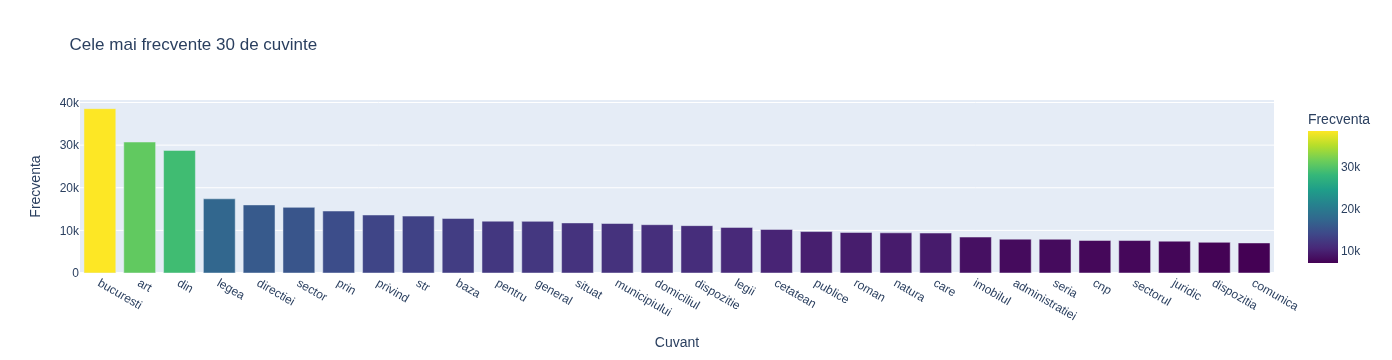

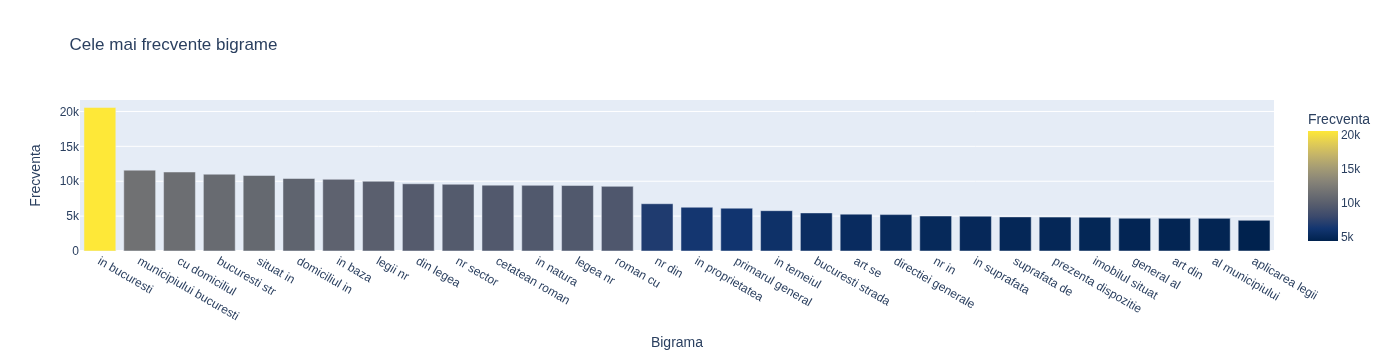

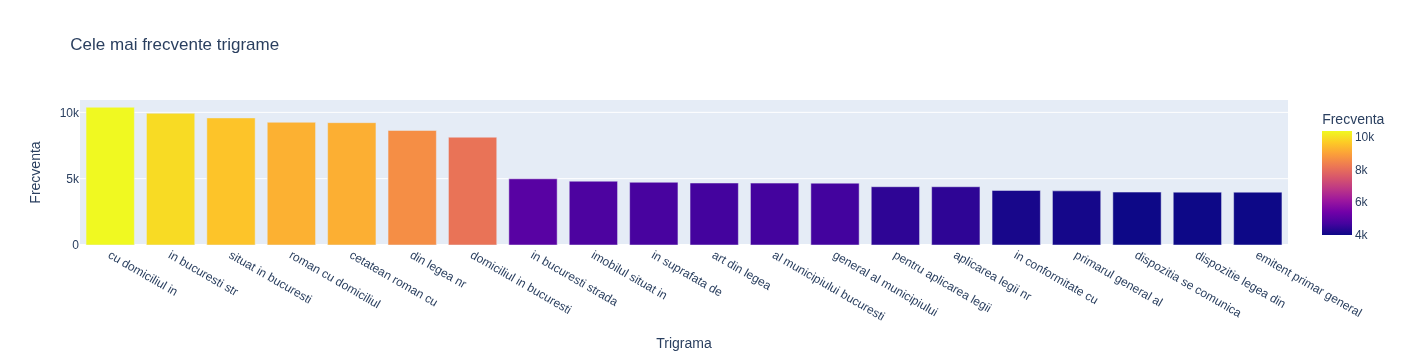

In [18]:
def get_tokens(text):
    text = re.sub(r"[^a-zA-Z\s]", " ", str(text))  
    tokens = [w.lower() for w in text.split() if len(w) > 2]
    return tokens

all_words = []
df["text_clean"].apply(lambda t: all_words.extend(get_tokens(t)))

cnt = Counter(all_words)
common_words = pd.DataFrame(cnt.most_common(30), columns=["Cuvant", "Frecventa"])

fig = px.bar(
    common_words,
    x="Cuvant",
    y="Frecventa",
    title="Cele mai frecvente 30 de cuvinte",
    color="Frecventa",
    color_continuous_scale="Viridis"
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

vectorizer = CountVectorizer(ngram_range=(2,2), max_features=40, token_pattern=r"(?u)\b[a-zA-Z]{2,}\b")
X = vectorizer.fit_transform(df["text_clean"])
bigrams = pd.DataFrame({
    "Bigrama": vectorizer.get_feature_names_out(),
    "Frecventa": X.toarray().sum(axis=0)
}).sort_values(by="Frecventa", ascending=False).head(30)

fig = px.bar(
    bigrams,
    x="Bigrama",
    y="Frecventa",
    title="Cele mai frecvente bigrame",
    color="Frecventa",
    color_continuous_scale="Cividis"
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

vectorizer = CountVectorizer(ngram_range=(3,3), max_features=30, token_pattern=r"(?u)\b[a-zA-Z]{2,}\b")
X = vectorizer.fit_transform(df["text_clean"])
trigrams = pd.DataFrame({
    "Trigrama": vectorizer.get_feature_names_out(),
    "Frecventa": X.toarray().sum(axis=0)
}).sort_values(by="Frecventa", ascending=False).head(20)

fig = px.bar(
    trigrams,
    x="Trigrama",
    y="Frecventa",
    title="Cele mai frecvente trigrame",
    color="Frecventa",
    color_continuous_scale="Plasma"
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

